# Conversão para Halftone

### Diógenes Wallis de França Silva

#### Acessando os arquivos do Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Carregando as bibliotecas

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

from skimage import io
from skimage.color import rgb2gray
from matplotlib import rcParams

%matplotlib inline

# Passo 1

In [ ]:
# Carregando a imagem em escala de cinza
url = "https://raw.githubusercontent.com/Wallis16/Processamento-de-Imagem/main/Exc1/lenna.png"

img = io.imread(url)
img = rgb2gray(img)

(512, 512)


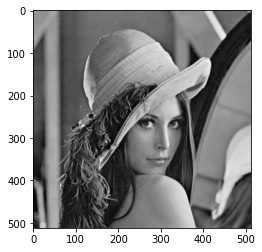

In [ ]:
print(img.shape)
imgplot = plt.imshow(img,cmap='gray')

# Passo 2

In [ ]:
# Normalização MinMax

img_minmax = img.copy()

img_minmax = img_minmax - np.min(img_minmax)

img_minmax = img_minmax / np.max(img_minmax)

img_minmax = np.round(img_minmax * 255)

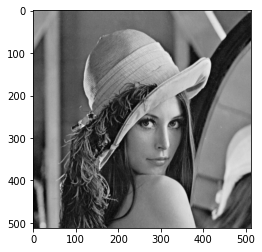

In [ ]:
imgplot = plt.imshow(img_minmax, cmap='gray')

# Passo 3

In [ ]:
#Para fazer a discretização em um range de 0 a 9 é necessário mapear 0 a 255 em 0 a 9.
#Consequentemente são 256 níveis para 10 intervalos, 256/10 = 25.6, arredondando ficamos com 26.
#A intensidade de cada pixel foi dividida por 26 e o resultado obtido foi arredondado para baixo.
#Seguem alguns exemplos dos intervalos de mapeamento:

#0 a 25 - 0
#26 a 51 - 1
#52 a 77 - 2
#78 a 103 - 3 ...

img_range0a9 = np.zeros((img_minmax.shape[0],img_minmax.shape[1]))

for i in range(img_minmax.shape[0]):
  for j in range(img_minmax.shape[1]):
    img_range0a9[i][j] = math.floor(img_minmax[i][j]/26)

# Passo 4

In [ ]:
# Aplicando o mapping halftone

# 0 lst = [[0,0,0],[0,0,0],[0,0,0]]
# 1 lst = [[0,255,0],[0,0,0],[0,0,0]]
# 2 lst = [[0,255,0],[0,0,0],[0,0,255]]
# 3 lst = [[255,255,0],[0,0,0],[0,0,255]]
# 4 lst = [[255,255,0],[0,0,0],[255,0,255]]
# 5 lst = [[255,255,255],[0,0,0],[255,0,255]]
# 6 lst = [[255,255,255],[0,0,255],[255,0,255]]
# 7 lst = [[255,255,255],[0,0,255],[255,255,255]]
# 8 lst = [[255,255,255],[255,0,255],[255,255,255]]
# 9 lst = [[255,255,255],[255,255,255],[255,255,255]]

mapping_halftone = []

mapping_halftone.append([[0,0,0],[0,0,0],[0,0,0]])
mapping_halftone.append([[0,255,0],[0,0,0],[0,0,0]])
mapping_halftone.append([[0,255,0],[0,0,0],[0,0,255]])
mapping_halftone.append([[255,255,0],[0,0,0],[0,0,255]])
mapping_halftone.append([[255,255,0],[0,0,0],[255,0,255]])
mapping_halftone.append([[255,255,255],[0,0,0],[255,0,255]])
mapping_halftone.append([[255,255,255],[0,0,255],[255,0,255]])
mapping_halftone.append([[255,255,255],[0,0,255],[255,255,255]])
mapping_halftone.append([[255,255,255],[255,0,255],[255,255,255]])
mapping_halftone.append([[255,255,255],[255,255,255],[255,255,255]])

#lst[range0a9][0]

In [ ]:
#A lista mapping_halftone contém os mapeamentos. Abaixo a imagem é lida pixel a pixel e assim é mapeado cada pixel
#para seu respectivo grid.

#lst = [[],[],[]]

lst = []

for i in range(512):

  lst.append([])
  lst.append([])
  lst.append([])

  for j in range(512):
    lst[0+3*i] += mapping_halftone[int(img_range0a9[i][j])][0]
    lst[1+3*i] += mapping_halftone[int(img_range0a9[i][j])][1]
    lst[2+3*i] += mapping_halftone[int(img_range0a9[i][j])][2]
  
img_halftone = np.array(lst)

# Passo 5

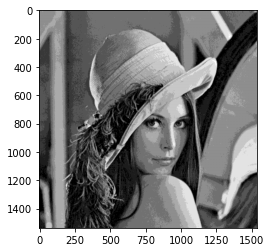

In [ ]:
# A imagem é salva em formato PNG.
# A nova imagem em meio-tom tem uma qualidade ótima e permite visualizar bem os elementos presentes na imagem original.

#Salvando a imagem em MyDrive, caso deseje salvar em outro diretório, basta alterar a variável 'path'

path = "/content/gdrive/MyDrive/"
cv2.imwrite("/content/gdrive/MyDrive/img_halftone.png",np.array(lst))

plt.imshow(img_halftone,cmap='gray')

# Passo 6

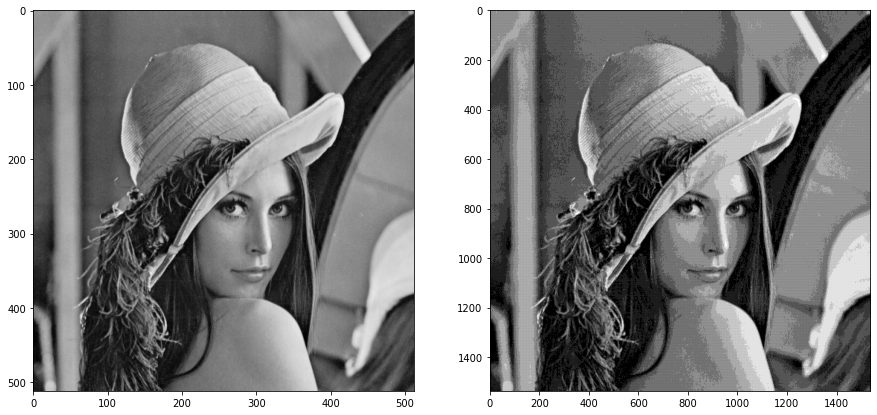

In [ ]:
# Comparando as imagens é possível visualizar que a imagem em meio-tom possibilita visualizar bem o que está na 
# imagem original. A principal diferença está no detalhamento das cores, uma vez que a imagem em meio-tom possui apenas
# dois níveis de cinza (branco ou preto, 1 ou 0). Mesmo utilizando a técnica de fazer o mapeamento dos pixels em grids
# 3x3, ainda assim não é possível trazer o mesmo detalhamento em cores, em algumas partes da imagem em meio-tom é
# possível visualizar regiões de tamanho significativo com a mesma cor, diferente da imagem original. Mas mesmo assim,
# o resultado é fantástico, visto que foram utilizados apenas dois níveis de cinza.

rcParams['figure.figsize'] = 15 ,8

fig, ax = plt.subplots(1,2)
ax[0].imshow(img,cmap='gray');
ax[1].imshow(img_halftone,cmap='gray');